# **CodSoft | Data Science | Internship | Task 4 | SALES PREDICTION USING PYTHON**

---

## **Problem Statement**

## **Task 4 | SALES PREDICTION USING PYTHON**

  - Sales prediction involves forecasting the amount of a product that customers will purchase, taking into account various factors such as advertising expenditure, target audience segmentation, and advertising platform selection.
  
  - In businesses that offer products or services, the role of a Data Scientist is crucial for predicting future sales. They utilize machine learning techniques in Python to analyze and interpret data, allowing them to make informed decisions regarding advertising costs. By leveraging these predictions, businesses can optimize their advertising strategies and maximize sales potential. Let's embark on the journey of sales prediction using machine learning in Python.


### **Import Necessary Libraries**

In [127]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

### **Load the Advertising.csv dataset**

In [128]:
# Load the Advertising.csv dataset
advertising_data = pd.read_csv('advertising.csv')

In [129]:
advertising_data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [130]:
advertising_data.tail()

,TV,Radio,Newspaper,Sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,18.4


In [131]:
advertising_data.shape

(200, 4)

In [132]:
advertising_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [133]:
advertising_data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


### **Data Exploration and Analysis**
 - **Let's start with some data exploration and visualization.**

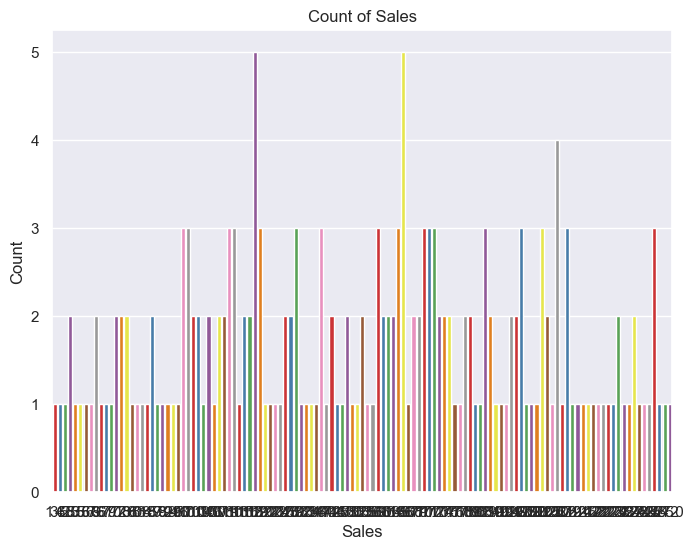

In [134]:
# Plot the count of Sales
sns.set(style="darkgrid")
plt.figure(figsize=(8, 6))
sns.countplot(data= advertising_data, x='Sales', palette='Set1')
plt.title('Count of Sales')
plt.xlabel('Sales')
plt.ylabel('Count')
plt.show()

### **Find The Average Sales For Each TV**

In [135]:
# Find The Average Sales For Each TV
advertising_data.groupby("TV")["Sales"].mean()

TV
0.7       1.6
4.1       3.2
5.4       5.3
7.3       5.5
7.8       6.6
         ... 
289.7    25.4
290.7    17.8
292.9    21.4
293.6    20.7
296.4    23.8
Name: Sales, Length: 190, dtype: float64

### **Top 10 TV of Sales**

In [136]:
# Top 10 TV of Sales
tvs = advertising_data.nlargest(10, "Sales")[["TV", "Sales"]].set_index("TV")
tvs

,Sales
TV,
276.9,27.0
287.6,26.2
283.6,25.5
266.9,25.4
289.7,25.4
243.2,25.4
220.3,24.7
281.4,24.4
261.3,24.2


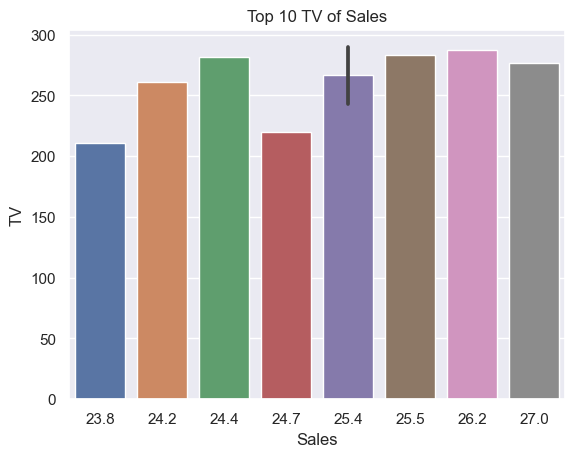

In [137]:
# Top 10 TV of Sales
sns.barplot(x = "Sales", y = tvs.index,data = tvs)
plt.title("Top 10 TV of Sales")
plt.show()

### **Find The Average Sales For Each Radio**

In [138]:
advertising_data.groupby("Radio")["Sales"].mean()

Radio
0.0     11.90
0.3     12.00
0.4      5.30
0.8      9.40
1.3     10.10
        ...  
47.8    16.70
48.9    17.10
49.0    25.05
49.4    19.20
49.6    23.80
Name: Sales, Length: 167, dtype: float64

### **Top 10 Radio of Sales**

In [139]:
# Top 10 Radio of Sales
rs = advertising_data.nlargest(10, "Sales")[["Radio", "Sales"]].set_index("Radio")
rs

,Sales
Radio,
48.9,27.0
43.0,26.2
42.0,25.5
43.8,25.4
42.3,25.4
49.0,25.4
49.0,24.7
39.6,24.4
42.7,24.2


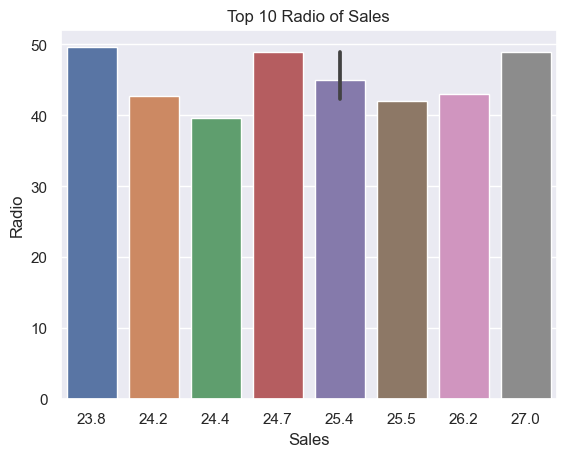

In [140]:
# Top 10 Radio of Sales
sns.barplot(x = "Sales", y = rs.index,data = rs)
plt.title("Top 10 Radio of Sales")
plt.show()

### **Find The Average Sales For Each Newspaper**

In [141]:
advertising_data.groupby("Newspaper")["Sales"].mean()

Newspaper
0.3      17.4
0.9      11.3
1.0       4.8
1.7      20.7
1.8      20.7
         ... 
79.2     15.9
84.8     16.9
89.4      8.7
100.9    23.8
114.0    12.5
Name: Sales, Length: 172, dtype: float64

### **Top 10 Newspaper of Sales**

In [142]:
# Top 10 Newspaper of Sales
ns = advertising_data.nlargest(10, "Sales")[["Newspaper", "Sales"]].set_index("Newspaper")
ns

,Sales
Newspaper,
41.8,27.0
71.8,26.2
66.2,25.5
5.0,25.4
51.2,25.4
44.3,25.4
3.2,24.7
55.8,24.4
54.7,24.2


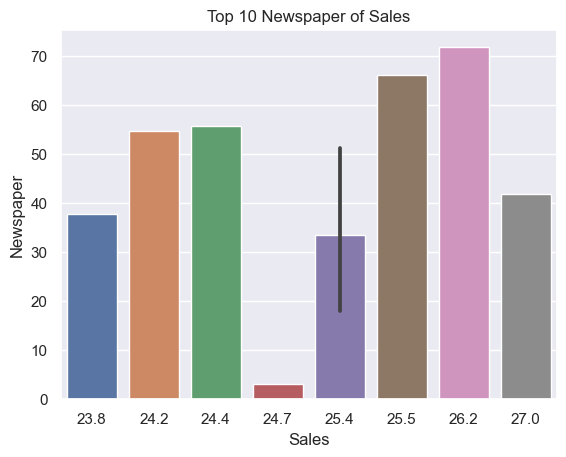

In [143]:
# Top 10 Newspaper of Sales
sns.barplot(x = "Sales", y = ns.index,data = ns)
plt.title("Top 10 Newspaper of Sales")
plt.show()

### **Display Number of Products Per Sales**

In [144]:
# Display Number of Products Per Sales
advertising_data["Sales"].value_counts()

11.9    5
16.7    5
20.7    4
11.0    3
11.3    3
       ..
13.4    1
24.2    1
8.1     1
5.5     1
25.5    1
Name: Sales, Length: 121, dtype: int64

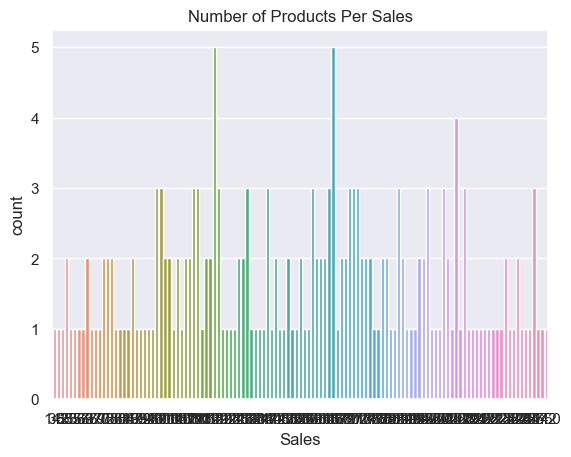

In [145]:
sns.countplot(x = "Sales", data = advertising_data)
plt.title("Number of Products Per Sales")
plt.show()

### **Now let's plot the correlation matrix of our data with a heatmap.**

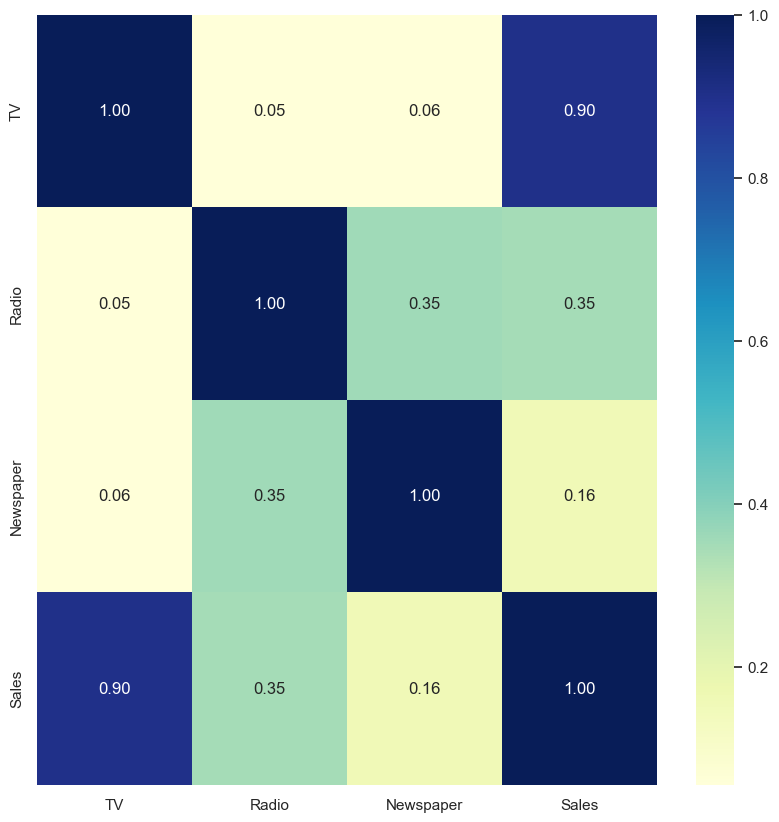

In [146]:
# Now let's plot the correlation matrix of our data with a heatmap.
plt.subplots(figsize=(10, 10))
sns.heatmap(advertising_data.corr(), cmap = "YlGnBu", annot=True, fmt=".2f")
plt.show()

### **Missing value Heatmap**

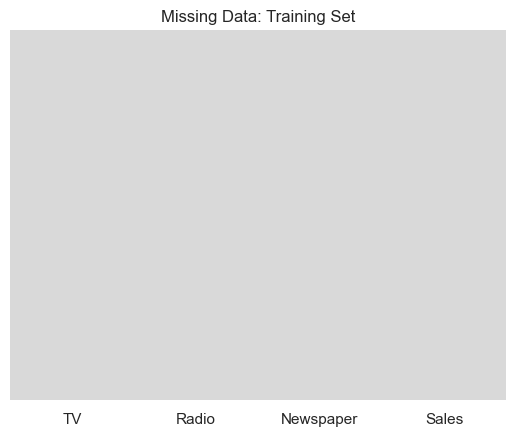

In [147]:
# Missing value Heatmap
sns.heatmap(advertising_data.isnull(),yticklabels = False, cbar = False,cmap = 'tab20c_r')
plt.title('Missing Data: Training Set')
plt.show()

In [148]:
advertising_data.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [149]:
advertising_data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


### **Split the dataset into features (X) and target variable (y)**

In [150]:
# Split the dataset into features (X) and target variable (y)
X = advertising_data.drop(['Sales'], axis=1)
y = advertising_data['Sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [151]:
print("Shape of X_train:" ,X_train.shape)
print("Shape of y_train:" ,y_train.shape)
print("Shape of X_test:" ,X_test.shape)
print("Shape of y_test:" ,y_test.shape)

Shape of X_train: (160, 3)
Shape of y_train: (160,)
Shape of X_test: (40, 3)
Shape of y_test: (40,)


### **Train a Linear Regression Model**

In [152]:
# Train a Linear Regression Model

# Model Selection
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)

LinearRegression()

### **Make predictions on the test data**

In [153]:
# Make predictions on the test data
y_pred = model.predict(X_test)

### **Evaluate the model's performance**

In [154]:
# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [155]:
print("Mean Squared Error:", mse)

Mean Squared Error: 2.907756910271091


In [156]:
print("R-squared:", r2)

R-squared: 0.9059011844150826


### **Plot Actual Sales VS Predicted Sales**

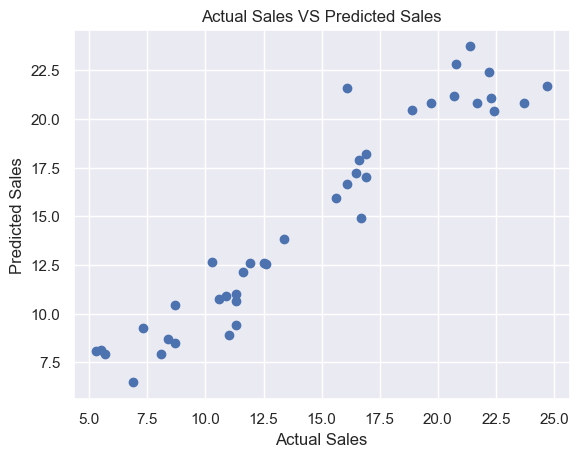

In [157]:
# Plot Actual Sales VS Predicted Sales
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual Sales VS Predicted Sales")
plt.show()

### **Predicting Sales**

In [158]:
# Predicting Sales
# You can use the trained model to predict sales for advertising sales.

new_advertising_sales = np.array([[340, 84, 95]])  
# Replace with your new_advertising_sales
predicted_sales = model.predict(new_advertising_sales)



c:\Python\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [159]:
print("Predicted Sales for New Advertising Sales:", predicted_sales[0].round())

Predicted Sales for New Advertising Sales: 32.0
